# Exercise Sheet 4: Machine Learning Fundamentals & Linear Regression (Deadline: 01 Dec 23:59)

# ML Fundamentals(7 points)
For theoretical tasks you are encouraged to write in $\\LaTeX$. Jupyter notebooks support them by default. For reference, please have a look at the examples in this short excellent guide: [Typesetting Equations](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Typesetting%20Equations.ipynb)

Alternatively, you can upload the solutions in the written form as images and paste them inside the cells. But if you do this, **make sure** that the images are of high quality, so that we can read them without any problems.

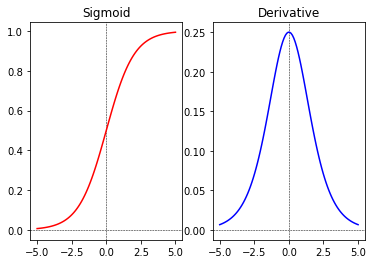

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def dsigmoid(x):
    return (sigmoid(x) * (1.0 - sigmoid(x)))

xs = np.linspace(-5.0, 5.0, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.axhline(0, ls='--', c='black', lw=.5)
ax1.axvline(0, ls='--', c='black', lw=.5)
ax2.axhline(0, ls='--', c='black', lw=.5)
ax2.axvline(0, ls='--', c='black', lw=.5)
ax1.plot(xs, sigmoid(xs), c='red')
ax2.plot(xs, dsigmoid(xs), c='blue')
ax1.set_title('Sigmoid')
ax2.set_title('Derivative');

###### 1. Sigmoid Function (1.5 points)
The special case of the logistic function is the *sigmoid function* which is defined as:

\begin{equation*}
  \sigma(a) = \frac{1}{1 + e^{-a}}
\end{equation*}

a) Compute its gradient analytically. (0.5 points)

In [2]:
from IPython.display import Image

Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_1.jpg?raw=true')

b) What are the inherent properties that you observe from the above computed gradient? (0.5 points) <br />
   *Hint: Think about how would the gradient signal be for the whole domain of the sigmoid function*

In [3]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_2_1.jpg?raw=true')

c) Prove that the sigmoid function is symmetric. (0.5 points)

In [4]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIA4_3c_1.jpg?raw=true')

**Points**: 1.5 of 1.5
**Comments**:
- None

###### 2. Regularization (3.5 points)

In the lecture, we've seen that we can add a *regularizer* to our cost function to avoid *over or underfitting*. For example, consider the following training criterion for linear regression:

\begin{equation*}
  J(\textbf{w}) = \frac{1}{m}\sum_{i=1}^{m} \Vert\hat{y}^{(i)} - y^{(i)}\Vert^{2} + \lambda\Omega(\textbf{w})
\end{equation*}
where $\Omega(\textbf{w}) = \textbf{w}^{T}\textbf{w}$ is the regularizer.

a) In the above criterion, what is the role of the regularization parameter $\lambda$ on the regularizer (i.e. parameters of our model) while minimizing $J(\textbf{w})$? (1.0 point)

b) Is $\lambda$ the model parameter or a hyperparameter? Justify.(0.5 points)

c) Derive the closed form solution for the weights ($\textbf{w}$) in the above criterion.(2.0 points)

In [5]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_4.jpg?raw=true')

In [6]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_5.jpg?raw=true')

**Points**: 2.5 of 3.5
**Comments**:
- $\lambda$ has no influence on the degree of the polynomial. It only influences the shrinkage of the weights. (-1.0 point)
- Please present your solution in the tutorial. Thanks!

###### 3. Maximum Likelihood Estimation (MLE) (2 points)
Consider the density function of a ***univariate Gaussian distribution***


\begin{equation*}
 p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}(x-\mu)^{2}\right)
\end{equation*}
where $\mu$ is the $\textit{mean}$ and $\sigma^{2}$ is the $\textit{variance}$. 

Let's say you're given *N* samples (i.e. $x_1, x_2, x_3, ..., x_N$) which are drawn from the above stated distribution. Also, you can assume that these samples are **i.i.d** (i.e. [independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)).

Now, please derive the *MLE step-by-step* for:

a) *mean* $(\mu)$. (1.0 point)

b) *variance* $(\sigma^2)$. (1.0 point)

In [7]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_6.jpg?raw=true')

**Points**: 1.0 of 1.0
**Comments**:
- None

In [8]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNAssignment4_7.jpg?raw=true')

**Points**: 1.0 of 1.0
**Comments**:
- None

# Multiple Linear Regression (13 points)

#### 1. Introduction
As we have seen in first assignment sheet, when we have one independent (or explanatory) variable and a scalar dependent variable, it is called **simple linear regression**.
But, when there are more than one explanatory variable (i.e. $x^{(1)}, x^{(2)}, ...,x^{(k)}$), and a single scalar dependent variable (*y*), then it's called $\textit{multiple linear regression}$. (Please don't confuse this with *multivariate linear regression* where we predict more than one (correlated) dependent variable.)

Here, we will implement a **multiple linear regression** model in Python/NumPy using the *Gradient Descent* algorithm. Particularly, we will be using $\textit{stochastic gradient descent}$ (*SGD*) where one performs the update step using a small set of training samples of size *batch_size* which we will set to 64. This is again a hyperparameter but in this exercise we will just use a fixed batch-size of *64* (i.e. we go through the training samples sampling 64 at a time and perform gradient descent.) Such a procedure is sometimes called *mini-batch gradient descent* in the deep learning community.

Going through all the training samples *once* is called an **epoch**. Ideally, the algorithm has to go through multiple epochs over the training samples, each time shuffling it, until a convergence criterion has been satisfied. <br />

Here, we will set a *tolerance value* for the difference in error (i.e. change in MSE values between subsequent epochs) that we will accept. Once this difference falls below the *tolerance value*, we terminate our training phase and return the parameters. 

We repeat the above training procedure for all possible hyperparameter combinations. Later on, using these parameters (*i.e. weight vectors*), we compute the prediction for validation data and the corresponding MSE values. And then, we pick the hyperparameter combination which yielded the least MSE.

As a next step, we will combine training data and validation data and make it as our *new training data*. We keep the test data as it is. Using the hyperparameter combination (for the least MSE) that we found above, we train the model again with the *new training data* and obtain the parameter (*i.e. weight vector*) after convergence according to our *tolerance value*.

Phew! That will be our much desired *weight vector*. This is then used on the *test data*, which has not been seen by our algorithm so far, to make a prediction. The resulting MSE value will be the so-called [*generalization error*](https://en.wikipedia.org/wiki/Generalization_error).

It is this *generalization error* that we want it to be as low as possible for *unseen data* (implies that we can achieve higher accuracy).

#### 2. Dataset
For our task, we will be using the *Wine Quality* dataset and predict the quality of white wine based on 11 features such as acidity, citric acid content, residual sugar etc. .

In [9]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(data_url, sep=';')

#inspect data
print(data.head())
print(data.shape)


#data as np array
data_npr = data.values
print(data_npr)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

#### 3. Loss function
We will use a *regularized* form of the MSE loss function. In matrix form it can be written as follows:

\begin{equation*}
    J(\textbf{w}) = \frac{1}{2} \Vert{X\textbf{w}-\textbf{y}}\Vert^{2} + \frac{\lambda}{2}\Vert{\textbf{w}}\Vert^{2}
\end{equation*}

It's important to note that, in the above equation, $X$, called *design matrix*, is the horizontal concatenation of shape *(batch_size, num_features)* according to the *order* of the polynomial. To make things easier, you can add the *bias* term as the first column of $X$. Take care to have the *weight* vector $\textbf{w}$ with matching dimensions.

$\textit{Hint}$: see [Design_matrix#Multiple_regression](https://en.wikipedia.org/wiki/Design_matrix#Multiple_regression) for how $X$ with 2 features looks like for $1^{st}$ degree polynomial.

a) Derive the gradient (w.r.t $\textbf{w}$) for the regularized loss function given in **3**. (1.0 point)

#### 4. Matrix format for higher order polynomial

Written in matrix form, linear regression model for second order would look like: <br />
$$\hat{\textbf{y}} = X\textbf{w}_{1} + X^{2}\textbf{w}_{2} + \textbf{b}$$

where $X^{2}$ is the element-wise squaring of the original design matrix $X$, $\textbf{w}_1$ and $\textbf{w}_2$ are the *weight* vectors, and **b** is the *bias* vector.

a) Now, please write down the matrix format for a $9^{th}$ order linear regression model (0.5 points)

In [10]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIA4_Pic_3.jpeg?raw=true')

#### 5. Hyperparameters
we will experiment with three hyperparameters:

i) regularization parameter $\lambda$ <br />
ii) learning rate $\epsilon$ <br />
iii) order of polynomial *p*

And do a grid search over the values that these hyperparameters can take in order to select the best combination (i.e. the one that achieves lowest test error). This approach is called **hyperparameter optimization or tuning**.

In [11]:
polynomial_order = [1, 5, 9]
learning_rates = [1e-5, 1e-8]
lambdas = [0.1, 0.8]

#hyperparams combination
comb_gen = itertools.product(*(polynomial_order, learning_rates, lambdas))
#list of all possible combinations of the hyper parameters
hparams_comb = list(comb_gen)

batch_size = 64


print(hparams_comb)

[(1, 1e-05, 0.1), (1, 1e-05, 0.8), (1, 1e-08, 0.1), (1, 1e-08, 0.8), (5, 1e-05, 0.1), (5, 1e-05, 0.8), (5, 1e-08, 0.1), (5, 1e-08, 0.8), (9, 1e-05, 0.1), (9, 1e-05, 0.8), (9, 1e-08, 0.1), (9, 1e-08, 0.8)]


#### 6. Normalization
First of all, inspect the data, and understand its structure and features. Ideally, before starting to train our learning algorithm, we would want the data to be normalized. Here, we normalize the data (i.e. normalize each column) using the formula:

\begin{equation*}
  norm\_x_i = \frac{x_i - min(x)}{max(x) - min(x)}
\end{equation*}
where $x_i$ is the $i^{th}$ sample in feature $x$

a) Complete the following function which performs normalization (i.e. normalizes columns of $X$). (0.5 points)

In [12]:
def data_normalization(data):
    """Does a normalization of the data"""
    
    # Turning DataFrame into a numpy array
    data = data.values
    l,w = data.shape
    data_normalized = np.zeros((l,w))
    # Feature wise Normalization
    for i in range(w):
        max_feat = np.amax(data[:,i])
        min_feat = np.amin(data[:,i])
        data_normalized[:,i] = (data[:,i]-min_feat)/(max_feat-min_feat)
    return data_normalized


# perform data normalization
data_normalized = data_normalization(data)
data_npr = data_normalized

In [13]:
def split_data(data_npr):
    # (in-place) shuffling of data_npr along axis 0
    # that means swapping rows of the data set(equals to swapping samples)
    np.random.shuffle(data_npr)

    n_tr = 3898
    n_va = n_tr + 500
    n_te = n_va + 500
    
    # Training data contains the samples 0-3898 
    X_train = data_npr[0:n_tr, 0:-1] #contains all 11 features
    Y_train = data_npr[0:n_tr, -1]   #contains (label) quality
    
    # Validation data contains the samples 3898-4398
    X_val = data_npr[n_tr:n_va, 0:-1]
    Y_val = data_npr[n_tr:n_va, -1]
    
     # Test data contains the samples 4389-4898
    X_test = data_npr[n_va:, 0:-1]
    Y_test = data_npr[n_va:, -1]
    
    #returns training, validation and testdata
    return [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]


# shuffle only the training data along axis 0
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    #Gets shuffeld row indices of Y_train, eg. [0,1,2,3,4]->[1,4,0,2,3]
    perm = np.random.permutation(len(Y_train))
    #Shuffels training data due to new index order
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf

###### 7. Implementation of required functions

Complete the following function which computes the MSE value. (0.5 point) <br />
(i.e. just a vanilla version of it.) That is, you can ignore the regularization term and also the constants $\frac{1}{2}$

In [14]:
def compute_mse(prediction, ground_truth):
    """Computes the mse from prediction and round_truth"""
    # TODO: implement
    mse = np.mean((prediction-ground_truth)**2)
    return mse

Implement a function which computes the prediction of your model. (0.5 point)

In [15]:
def get_prediction(X, W):
    """Computes the prediction from the input data and the weights"""
    # TODO: implement
    # With X = X_mat, W = W_mat as input
    Yhat = np.matmul(X,W)
    return Yhat

Implement a function which computes the gradient of your loss function. (1.0 point) <br />
*Hint: Just implementing the gradient computed in **3.** (a)*

In [16]:
def compute_gradient(X, Y, Yhat, W, lambda_):
    """Computes the gradient of the mse"""
    # TODO: implement
    # gradient: X'Xw-X'y+lw
    gradient = np.matmul(np.transpose(X),Yhat)-np.matmul(np.transpose(X),Y)+lambda_*W
    return gradient

Implement a function which performs a single update step of SGD. (0.5 point)

In [17]:
# Hint: avoid in-place modification
def sgd(gradient, lr, cur_W):
    """Computes one update step of the gradient descent"""
    # TODO: implement
    new_W = cur_W-lr*gradient
    return new_W

Complete the following function which reformats your data as a design matrix. (0.5 point)

In [18]:
# concatenate X acc. to order of polynomial; likewise do it for W
# where X is design matrix, W is the corresponding weight vector
# [1 X X^2 X^3], [1 W1 W2 W3].T
def prepare_data_matrix(X, W, order):
    """Constructs the data for our prediction"""
    # TODO: implement
    #X has the form: [x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11] with xi - column vectors
    l,w = X.shape
    X_mat = np.ones((l,1))
    W_vec = np.ones(1)
    # X_mat format:[1 X X^2... X^order]
    # X_vec format:[1 W1.T W2.T W3.T].T
    for i in range(order):
        X_mat = np.concatenate((X_mat,X**(i+1)),axis=1)
        W_vec = np.concatenate((W_vec,W),axis=0)
    return X_mat, W_vec

###### 8. Training
Complete the code in the following cell such that it performs **mini-batch gradient descent** on the training data for all possible hyperparameter combinations. (4.0 points)

Note: You can also define a function, named appropriately, which performs training. But, take care to do correct bookkeeping of hyperparameter combinations, weight vectors, and the MSE values.

In [19]:
splits = split_data(data_npr)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)

tolerance = 1e-3
start = 1

# initialize weight vector from normal distribution
# TODO: implement
# initialize weight vector
w_shape = X_train.shape[1]
W_init = np.random.randn(w_shape)

# cache weights for each hyperparam combination
# TODO: implement
weights_hist = {}

# keep track of MSE for each hparam combination. will be useful for plotting
# TODO: implement
mse_hist = {}

# Hyperparam.-combiation for each index, format: hyp_hist[index_dict:[order,lr,lamb]]
hyp_hist = {}
# index for all above defined dictionaries
index_dict = 1

# find optimal hyperparameters
for order in polynomial_order:
    for lr in learning_rates:
        for lamb in lambdas:
            # initialize necessary stuffs
            # TODO: implement
            #mse of all epocs
            mse_epocs = np.array(())
            mse_epocs = np.append(mse_epocs,1000)
            #number of batches that will be evaluated
            nsamples = Y_train.shape[0]/batch_size
            
            # design matrix needed at this point
            # use the function that we defined above
            # TODO: implement
            X_mat,W_vec = prepare_data_matrix(X_train, W_init, order)
            
            # epoch counter
            epochs = 1
            
            # goes through multiple epochs
            while True:
                # good idea to shuffle the train data
                # TODO: implement
                Xtr_shuf, Ytr_shuf = shuffle_train_data(X_mat, Y_train)
                
                # some more initialization
                # TODO: implement
                # batch counter
                bs = 1
                
                # goes through 1 epoch
                while bs < nsamples:
                    # complete code for 1 epoch
                    # TODO: implement
                    # gets X,Y and Y^ arrays for one batch out of the shuffeld data
                    X_batch = Xtr_shuf[batch_size*(bs-1):batch_size*bs,:]
                    Y_batch = Ytr_shuf[batch_size*(bs-1):batch_size*bs]
                    Yh_batch = get_prediction(X_batch,W_vec)
                    # does gradient descent for the batch data with respect to the weights
                    gradient = compute_gradient(X_batch,Y_batch,Yh_batch,W_vec,lamb)
                    W_vec = sgd(gradient, lr, W_vec)
                    bs = bs+1

                
                # after each epoch
                # get prediction for whole X_train
                Yh_ep = get_prediction(Xtr_shuf, W_vec)
                # compute the MSE
                MSE = compute_mse(Yh_ep,Ytr_shuf)
                # might need to do bookkeeping of mse values as well
                mse_epocs = np.append(mse_epocs,MSE)


                # stopping/convergence criterion
                # check whether diff-in-mse < tolerance
                # TODO: implement
                if abs(mse_epocs[epochs]-mse_epocs[epochs-1])<tolerance:
                    # cache weight vector for later use
                    # but we also need the hparam combination
                    # TODO: implement
                    weights_hist[index_dict] = W_vec
                    mse_hist[index_dict] = MSE
                    hyp_hist[index_dict] = [order,lr,lamb]
                    index_dict = index_dict + 1
                    print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
                    print("Convergence after epoch {} with MSE {}".format(epochs,MSE), "\n")
                    break
                epochs += 1

order: 1 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 37 with MSE 0.07727666422744776 

order: 1 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 37 with MSE 0.07595374164399288 

order: 1 , learning rate: 1e-08 , regularizer: 0.1 
Convergence after epoch 2 with MSE 0.9662100032293828 

order: 1 , learning rate: 1e-08 , regularizer: 0.8 
Convergence after epoch 2 with MSE 0.9662086466487196 

order: 5 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 75 with MSE 0.3975806660248412 

order: 5 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 113 with MSE 0.3319455526789154 

order: 5 , learning rate: 1e-08 , regularizer: 0.1 
Convergence after epoch 2 with MSE 4.81012276033358 

order: 5 , learning rate: 1e-08 , regularizer: 0.8 
Convergence after epoch 2 with MSE 4.81011722458427 

order: 9 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 205 with MSE 0.5529939448883541 

order: 9 , learning rat

Complete the following function which selects the best hyperparameter combination (i.e. the one that gives lowest MSE on **validation data**). (0.5 point)

In [20]:
# find hparams of minimum MSE on Validation data
def find_best_hparams(weights_hist):
    """finds the hparams of minimum MSE on Validation data"""
    # TODO: implement
    mse_best = 9999;
    len_mse = len(weights_hist)
    # goes through weights_hist and calculates the MSE for each weight set
    for i in range(len_mse):
        order = int((len(weights_hist[i+1])-1)/11)
        X_mat,_ = prepare_data_matrix(X_val, W_init, order)
        Yh_val = get_prediction(X_mat, weights_hist[i+1])
        mse = compute_mse(Yh_val,Y_val)
        print(mse)
        # checks if the mse of the current weight set is smaller than the previous one
        if mse<mse_best:
            mse_best = mse
            hpm_best = hyp_hist[i+1]
    return hpm_best, mse_best

# Stores the bes hyperparameter combination
best_hpm_combination = find_best_hparams(weights_hist)

0.0784539993274
0.0770463363023
0.97708002412
0.977078639694
0.344956866358
0.28413455905
4.84821897872
4.84821337536
0.344817091896
0.250678348254
5.78391205736
5.78390294028


###### 9. Re-Training on Train + Validation data
Complete the following function which does re-training on the combined training and validation data. (**1 point**)

In [21]:
#9.RE-TRAINING ON TRAIN +VALIDATION DATA

# re-run the training on X_train + X_val combined
# Later test it on X_test; That will be our best possible MSE on test data
# this will be more or less the same training code as you did above
# but, here we just have only one value for each hyperparameter.
# TODO: implement
splits = split_data(data_npr)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)
# combine training and validation data
X_retrain = np.concatenate((X_train,X_val),axis=0)
Y_retrain = np.concatenate((Y_train,Y_val),axis=0)

tolerance = 1e-3
start = 1

# initialize weight vector from normal distribution
# TODO: implement
# initialize weight vector
w_shape = X_train.shape[1]
W_init = np.random.randn(w_shape)

# cache weights for each hyperparam combination
# TODO: implement
weights_hist = {}


# keep track of MSE for each hparam combination. will be useful for plotting
# TODO: implement
mse_hist = {}

# hyperparam.-combination for each index, format: hyp_hist[index_dict:[order,lr,lamb]]
hyp_hist = {}
# index for all above defined dictionaries
index_dict =1

# Use optimal hyper parameters found above
order = best_hpm_combination[0][0]
lr = best_hpm_combination[0][1]
lamb = best_hpm_combination[0][2]

# initialize necessary stuffs
# TODO: implement
#mse of all epocs
mse_epocs = np.array(())
mse_epocs = np.append(mse_epocs,0)
#number of batches that will be evaluated
nsamples = Y_retrain.shape[0]/batch_size

# design matrix needed at this point
# use the function that we defined above
# TODO: implement
X_mat,W_vec = prepare_data_matrix(X_retrain, W_init, order)




epochs = 1
# goes through multiple epochs
while True:
    # good idea to shuffle the train data
    # TODO: implement
    Xtr_shuf, Ytr_shuf = shuffle_train_data(X_mat, Y_retrain)
    
    
    # some more initialization
    # TODO: implement
    
    # batch counter
    bs = 1

    
    
    # goes through 1 epoch
    while bs < nsamples:
        # complete code for 1 epoch
        # TODO: implement
        # gets X,Y and Y^ arrays for one batch out of the shuffeld data
        X_batch = Xtr_shuf[batch_size*(bs-1):batch_size*bs,:]
        Y_batch = Ytr_shuf[batch_size*(bs-1):batch_size*bs]
        Yh_batch = get_prediction(X_batch,W_vec)
        # does gradient descent for the batch data with respect to the weights
        gradient = compute_gradient(X_batch,Y_batch,Yh_batch,W_vec,lamb)
        W_vec = sgd(gradient, lr, W_vec)
        bs = bs+1

    
    # after each epoch
    # get prediction for whole X_train
    Yh_ep = get_prediction(Xtr_shuf, W_vec)
    # compute the MSE
    MSE = compute_mse(Yh_ep,Ytr_shuf)
    # might need to do bookkeeping of mse values as well
    mse_epocs = np.append(mse_epocs,MSE)


    # stopping/convergence criterion
    # check whether diff-in-mse < tolerance
    # TODO: implement
    if abs(mse_epocs[epochs]-mse_epocs[epochs-1])<tolerance:
        # cache weight vector for later use
        # but we also need the hparam combination
        # TODO: implement
        weights_hist[index_dict] = W_vec
        mse_hist[index_dict] = MSE
        hyp_hist[index_dict] = [order,lr,lamb]
        index_dict = index_dict + 1
        print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
        print("Convergence after epoch {} with MSE {}".format(epochs,MSE), "\n")
        break
    epochs += 1

order: 1 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 21 with MSE 0.07595066797158542 



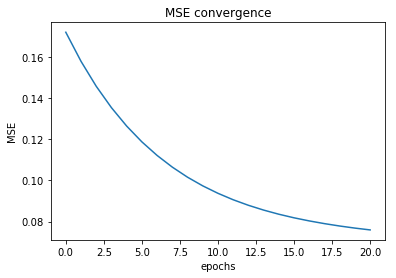

In [22]:
# plot the convergence of MSE values using matplotlib
# i.e. #epochs on X-axis and MSE values on Y-axis
# TODO: implement                
plt.figure(1)
plt.title('MSE convergence')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.plot(mse_epocs[1:]);

###### 10. Evaluation on Test set
Evaluate your model on test data. (1.0 point)

**Please note that you should keep X_test undisturbed throughout this whole phase.** Else restart the kernel and start from beginning. The whole point of this exercise would not make sense if test data has been *seen in training*.

In [ ]:
# finally!!!
# test it on X_test with the Weight vector that you found above
# this will be the generalization error of our model!!
# TODO: implement
order = int((len(weights_hist[1])-1)/11)
X_mat,_ = prepare_data_matrix(X_test, W_init, order)
Yh_test = get_prediction(X_mat, weights_hist[1])
mse_test = compute_mse(Yh_test,Y_test)
print("Finally!!! MSE achieved on X_test is : {}".format(round(mse_test, 6)))

Finally!!! MSE achieved on X_test is : 0.069593


###### 11. Results
Please report the following

a) MSE value on Test data. (0.5 points)
MSE achieved on Test data is : 0.077158

b) Which hyperparameter combination turned out to be the best? In your understanding, why do you think such a combination turned out to be the best for this task? (1.0 point)

Best combination: order: 1 , learning rate: 1e-05 , regularizer: 0.8;

The best combination constitutes of the higher regularizer, which avoids overfitting of the training data, therefore the order is quite small. 
The smaller learning rate as could be seen from the training phase, was converging at a wrong place, and giving higher MSE. It could be because of the larger tolerance value, and the fact that we are using multiple batches, if for each batch the minimum jumps a little bit, and the jump in the minimum is greater than the steps we take with the smaller learning rate, we might end up converging in the wrong place.


**Points**: 13.0 of 13.0
**Comments**:
- None

# Bonus (2 points)

Now, please repeat the whole *training, validation, re-training, and testing* procedure that we talked about above with the following hyperparameter combination:

polynomial_order = [1]
learning_rates = [0.1]
lambdas = [0.1]

In [ ]:
# Repetition of the training with the given hyperparameters
splits = split_data(data_npr)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)

tolerance = 1e-3
start = 1

# initialize weight vector from normal distribution
# TODO: implement
# initialize weight vector
w_shape = X_train.shape[1]
W_init = np.random.randn(w_shape)

# cache weights for each hyperparam combination
# TODO: implement
weights_hist = {}


# keep track of MSE for each hparam combination. will be useful for plotting
# TODO: implement
mse_hist = {}

# hyperparam.-combination for each index, format: hyp_hist[index_dict:[order,lr,lamb]]
hyp_hist = {}
# index for all above defined dictionaries
index_dict =1

# Use given hyperparameters 
order = 1
lr = 0.1
lamb = 0.1

# initialize necessary stuffs
# TODO: implement
#mse of all epocs
mse_epocs = np.array(())
mse_epocs = np.append(mse_epocs,0)
#number of batches that will be evaluated
nsamples = Y_retrain.shape[0]/batch_size

# design matrix needed at this point
# use the function that we defined above
# TODO: implement
X_mat,W_vec = prepare_data_matrix(X_train, W_init, order)




epochs = 1
# goes through multiple epochs
while True:
    # good idea to shuffle the train data
    # TODO: implement
    Xtr_shuf, Ytr_shuf = shuffle_train_data(X_mat, Y_train)
    
    
    # some more initialization
    # TODO: implement
    
    # batch counter
    bs = 1

    
    
    # goes through 1 epoch
    while bs < nsamples:
        # complete code for 1 epoch
        # TODO: implement
        # gets X,Y and Y^ arrays for one batch out of the shuffeld data
        X_batch = Xtr_shuf[batch_size*(bs-1):batch_size*bs,:]
        Y_batch = Ytr_shuf[batch_size*(bs-1):batch_size*bs]
        Yh_batch = get_prediction(X_batch,W_vec)
        print("Printing Predictions:",Yh_batch)
        # does gradient descent for the batch data with respect to the weights
        gradient = compute_gradient(X_batch,Y_batch,Yh_batch,W_vec,lamb)
        W_vec = sgd(gradient, lr, W_vec)
        bs = bs+1

    
    # after each epoch
    # get prediction for whole X_train
    Yh_ep = get_prediction(Xtr_shuf, W_vec)
    # compute the MSE
    MSE = compute_mse(Yh_ep,Ytr_shuf)
    # might need to do bookkeeping of mse values as well
    mse_epocs = np.append(mse_epocs,MSE)


    # stopping/convergence criterion
    # check whether diff-in-mse < tolerance
    # TODO: implement
    if abs(mse_epocs[epochs]-mse_epocs[epochs-1])<tolerance:
        # cache weight vector for later use
        # but we also need the hparam combination
        # TODO: implement
        weights_hist[index_dict] = W_vec
        mse_hist[index_dict] = MSE
        hyp_hist[index_dict] = [order,lr,lamb]
        index_dict = index_dict + 1
        print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
        print("Convergence after epoch {} with MSE {}".format(epochs,MSE), "\n")
        break
    epochs += 1

Printing Predictions: [ 0.2737675  -0.00104008  0.61544532  0.14314019  0.0240579   0.36741472
  0.18749963  0.33471041  0.38466994  0.66760355  0.39216171  0.41471431
  0.31450519  0.54988146  0.3912307   0.28495747  0.52553789  0.47780765
  0.69193723  0.48709252  0.49047852  0.37943826  0.4690371   0.65786654
  0.44736023  0.22504138  0.19057417  0.17091478  0.23326952  0.5643881
  0.57005282  0.42431099  0.18270621  0.24715843  0.42537575  0.11607101
  0.09428536  0.48310297  0.23764859  0.20920587  0.32072841  0.38610982
  0.54256071  0.05476463  0.42664609  0.67930436  0.05405932  0.35302833
  0.37649909  0.29259399  0.62056603  0.22971535  0.33202472  0.51263028
  0.42258791  0.40522577  0.42768855  0.3705651   0.24553976  0.63652057
  0.54745553  0.70306735  0.34145566  0.29091274]
Printing Predictions: [ 1.69939596  1.55256812  1.89785939  1.71495565  1.84244979  1.72966633
  1.71889915  1.4768565   1.6526824   1.77613481  1.74051471  1.70180072
  1.6516054   1.76537504  1.753

/home/marius/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/home/marius/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars


[ -2.86162566e+249  -2.85378454e+249  -2.86349622e+249  -2.74934096e+249
  -2.73022859e+249  -2.38343681e+249  -3.02498100e+249  -2.80739492e+249
  -2.73862745e+249  -2.89384778e+249  -3.00955969e+249  -2.81997724e+249
  -2.76043149e+249  -2.81655372e+249  -2.60147922e+249  -2.75081974e+249
  -2.93319748e+249  -2.89553416e+249  -2.56691338e+249  -2.42196026e+249
  -2.64880230e+249  -2.94371545e+249  -2.73339592e+249  -3.10658272e+249
  -2.87701211e+249  -2.51502283e+249  -2.90452201e+249  -2.76720742e+249
  -2.77633363e+249  -2.92685416e+249  -2.71910733e+249  -2.84210372e+249
  -2.86766977e+249  -2.68072616e+249  -2.72566901e+249  -2.64626428e+249
  -2.67925350e+249  -2.56676801e+249  -2.74108318e+249  -2.72635726e+249
  -2.69922908e+249  -2.85484913e+249  -2.92861069e+249  -2.74340009e+249
  -2.70370150e+249  -2.84257787e+249  -2.66274074e+249  -2.72088091e+249
  -2.64733586e+249  -2.76319170e+249  -3.14044889e+249  -2.64287738e+249
  -2.75397804e+249  -2.94088885e+249  -2.83530277e+

/home/marius/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
Printing Predictions: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
Printing Predictions: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan


#### What are your observations during the training phase? Please explain why such a behaviour happened.

We get an overflow in the mse calculation, which means that the predicted values are quite different from the real values. The reason for that is, that the weights are not converging. The learning rate is too big and therefore the jumps that we are doing with the gradient descent are also too big. Instead of sliding down to a minimum, we are hopping through to function.

**Points**: 2.0 of 2.0
**Comments**:
- None

---

## Grading: 19.0 of 20.0 points + 2.0 bonus points. Well done!

---

## Submission instructions
You should provide a single Jupyter notebook as the solution. The naming should include the assignment number and matriculation IDs of all members in your team in the following format:
**assignment-4_matriculation1_matriculation2_matriculation3.ipynb** (in case of 3 members in a team). 
Make sure to keep the order matriculation1_matriculation2_matriculation3 the same for all assignments.

Please submit the solution to your tutor (with **[NNIA][assignment-4]** in email subject):
1. Maksym Andriushchenko <s8mmandr@stud.uni-saarland.de>
2. Marius Mosbach <s9msmosb@stud.uni-saarland.de>
3. Rajarshi Biswas <rbisw17@gmail.com>
4. Marimuthu Kalimuthu <s8makali@stud.uni-saarland.de>

Note: **If you are in a team, please submit only 1 solution to only 1 tutor.**